# Digit Predictor using CNN

This project is a simple implementation of a Convolutional Neural Network (CNN) trained on the MNIST dataset to recognize handwritten digits. A graphical user interface (GUI) allows users to draw a digit, and the model predicts the digit along with the confidence of the prediction.

[![GitHub Repo](https://img.shields.io/badge/GitHub-Repository-blue?style=flat&logo=github)](https://github.com/HARIPRASADS-01/digit-recognition)

## Table of Contents
- [Introduction](#introduction)
- [Model Architecture](#model-architecture)
- [Dataset](#dataset)
- [Training Details](#training-details)
- [Usage](#usage)
- [GUI](#gui)
- [Screenshots](#screenshots)
- [Results](#results)
- [How to Run](#how-to-run)
- [Requirements](#requirements)
- [Pre-trained Model](#pre-trained-model)
- [Contributing](#contributing)
- [License](#license)
- [Final Notes](#final-notes)

---

## Introduction

This project uses a CNN model to classify handwritten digits (0-9). The model is trained on the MNIST dataset and achieves high accuracy. A graphical interface built with `tkinter` allows users to draw digits on a canvas, which are then passed to the trained model for real-time prediction.

---

## Model Architecture

The CNN model consists of multiple convolutional, pooling, normalization, and dense layers. Below is a visual summary of the model architecture:

![Model Summary](images/model_summary.png)  
*This diagram shows the layers, their configurations, and the number of parameters in the CNN model.*

Key components of the model include:
- **Conv2D**: Convolutional layers with ReLU activation for feature extraction.
- **BatchNormalization**: Normalizes the inputs to each layer, improving training stability.
- **MaxPooling2D**: Reduces spatial dimensions while retaining important features.
- **Flatten**: Converts the 2D feature maps into a 1D vector for dense layers.
- **Dense**: Fully connected layers for classification.
- **Dropout**: Randomly drops neurons during training to prevent overfitting.
- **Softmax**: Outputs probabilities for each digit class (0-9).

---

## Dataset

The model is trained on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), which consists of 28x28 grayscale images of handwritten digits (0-9). The dataset is split into:
- **Training set**: 60,000 images
- **Test set**: 10,000 images

The data is normalized to the range [0, 1] before training.

---

## Training Details

The model was trained using the Adam optimizer and categorical cross-entropy loss. It was trained for up to 30 epochs with a batch size of 64. Data augmentation techniques were applied to improve generalization:
- Rotation range: ±10°
- Zoom range: ±10%
- Width and height shift: ±10%

### Training Metrics

- **Training Accuracy**  
   ![Training Accuracy](images/accuracy_plot.png)  
   *This plot shows the increase in training accuracy over epochs.*

- **Training Loss**  
   ![Training Loss](images/loss_plot.png)  
   *This plot shows the decrease in training loss over epochs.*

### Callbacks
- **ReduceLROnPlateau**: Reduces learning rate when validation accuracy plateaus.
- **EarlyStopping**: Stops training if validation loss does not improve for 5 consecutive epochs.

---

## Usage

Once the model is trained, it can be used in the graphical interface (GUI) to predict digits. To use the application:

1. Draw a digit on the canvas using the mouse.
2. The model will automatically predict the digit when you release the mouse button.
3. The predicted digit and confidence percentage will be displayed.

---

## GUI

The GUI consists of:
- A canvas to draw digits.
- A **Clear** button to reset the canvas.
- A **Help** button to display instructions for use.
- A **Quit** button to close the application.

### GUI Workflow
1. The user draws a digit on the canvas.
2. The drawn image is resized to 28x28 pixels, inverted, and smoothed to match the input format of the CNN model.
3. The preprocessed image is passed to the model for prediction.
4. The predicted digit and confidence score are displayed in real-time.

---

## Screenshots

Below are screenshots of the application in action:

- **GUI Screenshot**  
   ![GUI Screenshot](images/gui_screenshot.png)  
   *The GUI includes a canvas for drawing digits, buttons for actions, and a prediction display.*

- **Sample Prediction**  
   ![Sample Prediction](images/sample_prediction.png)  
   *The model predicted the digit "7" with 98% confidence.*

---

## Results

### Confusion Matrix
The confusion matrix below summarizes the model's performance on the test dataset:

![Confusion Matrix](images/confusion_matrix.png)  
*Each cell represents the number of predictions for a specific class.*

### Evaluation Metrics
- **Test Accuracy**: 99.2%
- **Test Loss**: 0.024

Metrics per class:
| Class | Precision | Recall | F1-Score |
|-------|-----------|--------|----------|
| 0     | 0.994     | 0.996  | 0.995    |
| 1     | 0.993     | 0.995  | 0.994    |
| ...   | ...       | ...    | ...      |

---

## How to Run

1. Clone the repository:
    ```bash
    git clone https://github.com/HARIPRASADS-01/digit-recognition.git
    ```

2. Install the required dependencies:
    ```bash
    pip install -r requirements.txt
    ```

3. Run the GUI:
    ```bash
    python gui.py
    ```
    The application window will open. Draw a digit on the canvas, and the model will predict the digit.

---

## Requirements

You need the following libraries to run the project:
- tensorflow
- numpy
- pillow
- tkinter (usually pre-installed with Python)

Install them using:
```bash
pip install tensorflow numpy pillow
```
## Pre-trained Model

A pre-trained model is included in the repository (`model.h5`). You can use this model directly without retraining. To train the model yourself, refer to the [model.ipynb](model.ipynb) notebook.


## Contributing

Contributions are welcome! Please follow these steps:

1. Fork the repository.
2. Create a new branch for your feature/fix.
3. Submit a pull request with a detailed description of your changes.

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import itertools
import visualkeras
from PIL import ImageFont

In [19]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [21]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [22]:


# Model Architecture
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', name='Conv2D_1'),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='MaxPooling2D_1'),

    Conv2D(64, (3, 3), activation='relu', name='Conv2D_2'),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='MaxPooling2D_2'),

    Conv2D(64, (3, 3), activation='relu', name='Conv2D_3'),
    BatchNormalization(),

    Flatten(name='Flatten'),
    Dense(64, activation='relu', name='Dense_1'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax', name='Output')
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_1 (MaxPooling2D)   │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2D_2 (MaxPooling2D)   │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,218 (368.04 KB)

 Trainable params: 93,770 (366.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Callbacks
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [25]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=30,
    validation_data=(X_test, y_test_cat),
    callbacks=[lr_reduce, early_stop]
)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 73ms/step - accuracy: 0.7896 - loss: 0.6992 - val_accuracy: 0.9532 - val_loss: 0.1528 - learning_rate: 0.0010
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9626 - loss: 0.1286 - val_accuracy: 0.9814 - val_loss: 0.0586 - learning_rate: 0.0010
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9734 - loss: 0.0906 - val_accuracy: 0.9856 - val_loss: 0.0476 - learning_rate: 0.0010
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9763 - loss: 0.0832 - val_accuracy: 0.9881 - val_loss: 0.0349 - learning_rate: 0.0010
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.9791 - loss: 0.0702 - val_accuracy: 0.9880 - val_loss: 0.0404 - learning_rate: 0.0010
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9815 - loss: 0.0610 - val_accuracy: 0.9916 - val_loss: 0.0255 - learning_rate: 0.0010
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9848 - l

In [26]:
# Save the model
model.save('model.h5')

In [27]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


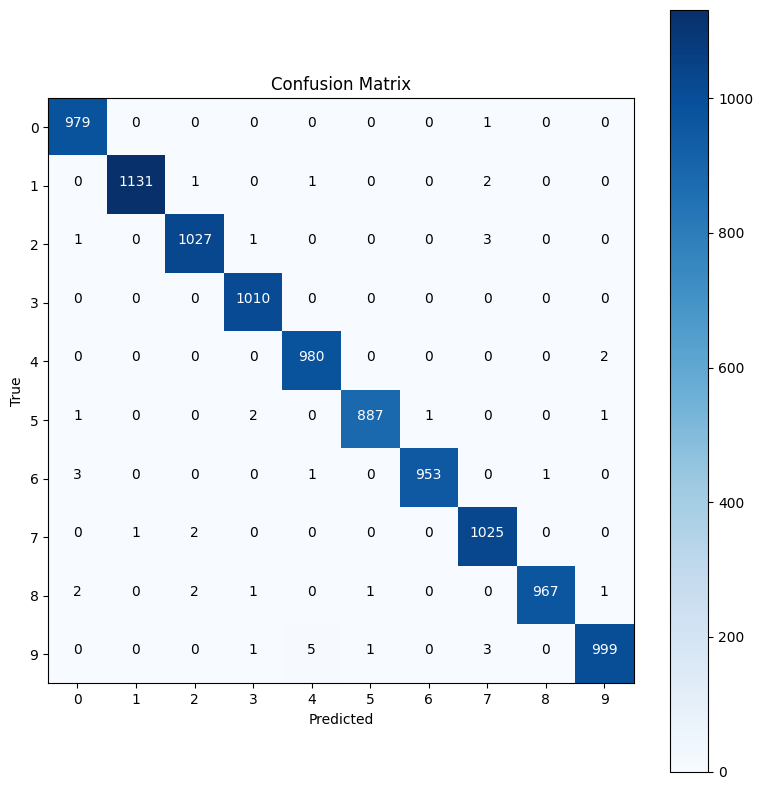

In [28]:
# Confusion matrix
conf_mtx = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(conf_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('True')

thresh = conf_mtx.max() / 2
for i, j in itertools.product(range(conf_mtx.shape[0]), range(conf_mtx.shape[1])):
    plt.text(j, i, format(conf_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


In [29]:
# Calculate metrics
TP = np.diag(conf_mtx)
TN = np.sum(conf_mtx) - (np.sum(conf_mtx, axis=0) + np.sum(conf_mtx, axis=1) - np.diag(conf_mtx))
FP = np.sum(conf_mtx, axis=0) - TP
FN = np.sum(conf_mtx, axis=1) - TP

precision = precision_score(y_true_labels, y_pred_labels, average=None)
recall = recall_score(y_true_labels, y_pred_labels, average=None)
f1 = f1_score(y_true_labels, y_pred_labels, average=None)

for i in range(10):
    print(f"Class {i}: TP={TP[i]}, TN={TN[i]}, FP={FP[i]}, FN={FN[i]}, Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1={f1[i]:.4f}")

Class 0: TP=979, TN=9013, FP=7, FN=1, Precision=0.9929, Recall=0.9990, F1=0.9959
Class 1: TP=1131, TN=8864, FP=1, FN=4, Precision=0.9991, Recall=0.9965, F1=0.9978
Class 2: TP=1027, TN=8963, FP=5, FN=5, Precision=0.9952, Recall=0.9952, F1=0.9952
Class 3: TP=1010, TN=8985, FP=5, FN=0, Precision=0.9951, Recall=1.0000, F1=0.9975
Class 4: TP=980, TN=9011, FP=7, FN=2, Precision=0.9929, Recall=0.9980, F1=0.9954
Class 5: TP=887, TN=9106, FP=2, FN=5, Precision=0.9978, Recall=0.9944, F1=0.9961
Class 6: TP=953, TN=9041, FP=1, FN=5, Precision=0.9990, Recall=0.9948, F1=0.9969
Class 7: TP=1025, TN=8963, FP=9, FN=3, Precision=0.9913, Recall=0.9971, F1=0.9942
Class 8: TP=967, TN=9025, FP=1, FN=7, Precision=0.9990, Recall=0.9928, F1=0.9959
Class 9: TP=999, TN=8987, FP=4, FN=10, Precision=0.9960, Recall=0.9901, F1=0.9930


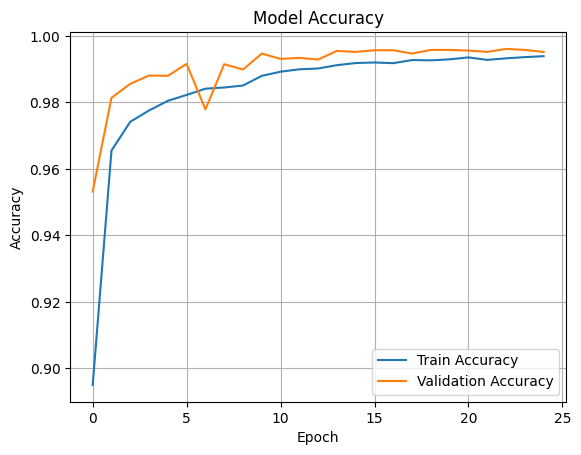

In [30]:
# Plot training & validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

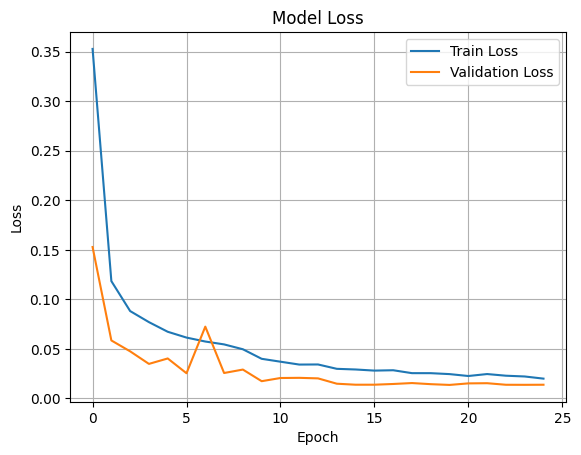

In [31]:
# Plot training & validation loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

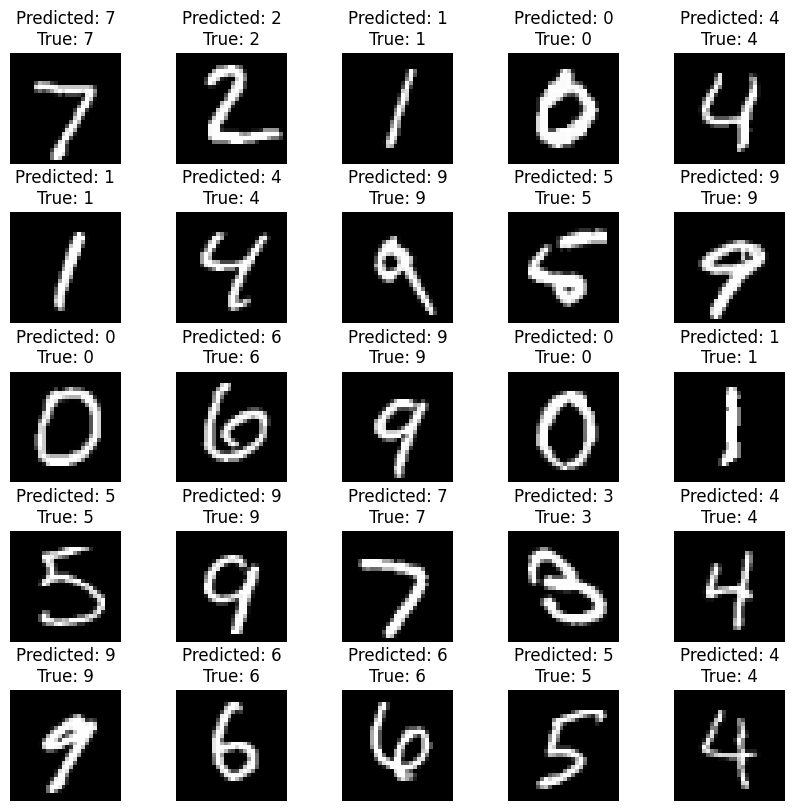

In [32]:
# Plot some predictions
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Predicted: {y_pred_labels[i]}\nTrue: {y_true_labels[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)
plt.show()

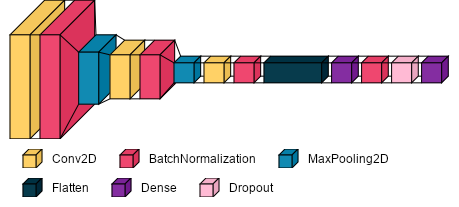

In [35]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='visualkeras')

# Now run the visualization code
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font)


In [36]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print('Test accuracy:', accuracy)
print('Test loss:', loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9942 - loss: 0.0170
Test accuracy: 0.9958000183105469
Test loss: 0.013697125017642975
